In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
df=pd.read_csv('iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(columns=['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#display no of species on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Processing dataset

In [ ]:
 df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data analysis

<AxesSubplot:>

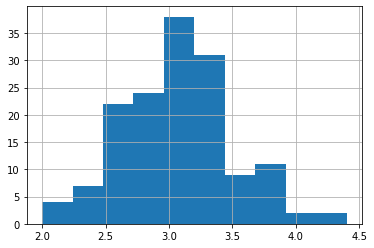

In [ ]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

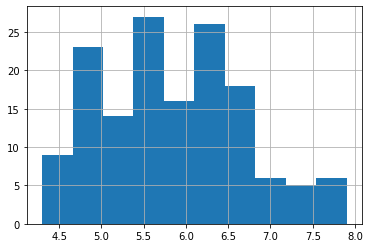

In [ ]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

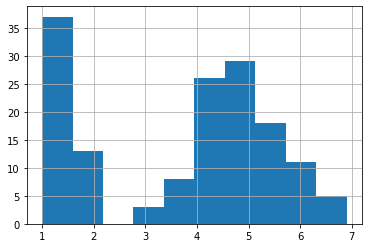

In [ ]:
df['PetalLengthCm'].hist()

In [ ]:
#create list of colors and class labels
colors=[(1,0, 0), (0, 1, 0), (0, 0, 1)]
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

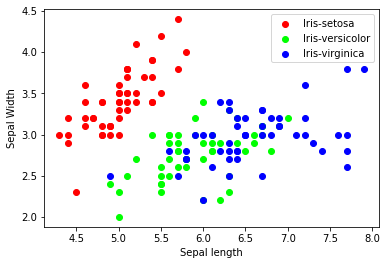

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],color=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

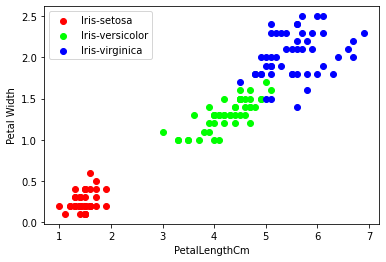

In [ ]:
for i in range(len(species)):
    x=df[df['Species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],color=colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

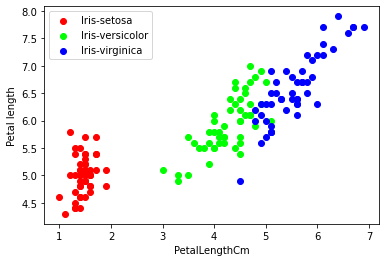

In [ ]:
for i in range(len(species)):
    x=df[df['Species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'],color=colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("Petal length")
plt.legend()
plt.show()

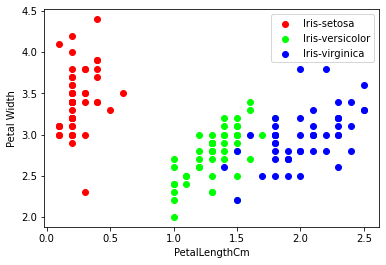

In [ ]:
for i in range(len(species)):
    x=df[df['Species']==species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalWidthCm'],x['SepalWidthCm'],color=colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

# correlation matrix

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

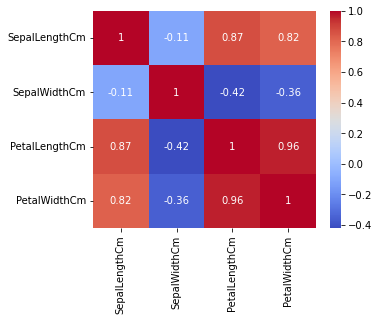

In [ ]:
corr=df.corr()
#plot the heat map
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True,ax=ax,cmap='coolwarm')

# Label Encoding

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df['Species']=le.fit_transform(df['Species'])
#df.head()


# model training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [ ]:
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test) * 100)


Logistic Regression Accuracy: 97.77777777777777


In [ ]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [ ]:
print("Logistic Regression Accuracy:",model.score(x_test,y_test) * 100)

Logistic Regression Accuracy: 97.77777777777777


In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("DecisionTreeClassifier Accuracy:",model.score(x_test,y_test) * 100)
model.fit(x_train,y_train)


DecisionTreeClassifier Accuracy: 97.77777777777777


DecisionTreeClassifier()

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("KNeighbors classifier Accuracy:",model.score(x_test,y_test) * 100)
model.fit(x_train.values,y_train.values)

KNeighbors classifier Accuracy: 100.0


KNeighborsClassifier()

In [ ]:
#save the model
import pickle
filename = 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
import pickle
filename = 'saved_model.sav'

try:
    with open(filename,'wb')as file:
        pickle.dump(model,file)
    print("Model saved sucessfully")
except Exception as e:
    print(f"Error saving the model:{e}")


Model saved sucessfully


In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.0


In [ ]:
x_test.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
99,5.7,2.8,4.1,1.3
65,6.7,3.1,4.4,1.4
14,5.8,4.0,1.2,0.2
63,6.1,2.9,4.7,1.4
134,6.1,2.6,5.6,1.4


In [ ]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)